In [152]:
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
# Loading the data
df = pd.read_csv('publYear.csv')
print(f"Original no of records: {len(df)}")
df.head(10)

Original no of records: 1562158


,#key,year
0,books/acm/17/OSCSPK2017,2017
1,books/acm/17/Qvarfordt17,2017
2,books/acm/18/Bengio0MS18,2018
3,books/acm/18/BurzoA18,2018
4,books/acm/18/ZhouY00A18,2018
5,books/acm/19/000119c,2019
6,books/acm/19/0001GM19,2019
7,books/acm/19/BohusH19,2019
8,books/acm/19/FriedlandT19,2019
9,books/acm/19/GoldwasserMR19,2019


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562158 entries, 0 to 1562157
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   #key    1561972 non-null  object
 1   year    1562158 non-null  object
dtypes: object(2)
memory usage: 23.8+ MB


In [155]:
# Data Cleaning the data by removing rows with null values
df_clean = df.dropna()
df_clean.describe()

,#key,year
count,1561972,1561972
unique,1561807,176
top,journals/jitt/ZhangF18,2024
freq,2,109068


In [156]:
# Before filtering checking year range
print("Before filtering:")
print(f"Total rows: {len(df_clean)}")
print(f"Year column min: {df_clean['year'].min()}, max: {df_clean['year'].max()}")

Before filtering:
Total rows: 1561972
Year column min: 1597, max: 7e9


In [157]:
# droping rows if 'year' is not a valid integer
df_clean = df_clean[df_clean['year'].apply(lambda x: str(x).isdigit())]
print(f"After removing non-numeric values: {len(df_clean)} records")

# converting 'year' to int
df_clean['year'] = df_clean['year'].astype(int)

# Filtering years between 1500 and 2025
df_clean = df_clean[(df_clean['year'] >= 1500) & (df_clean['year'] <= 2025)]
print(f"After filtering valid years: {len(df_clean)} records")

print(df_clean.head(n=10))

After removing non-numeric values: 1560922 records
After filtering valid years: 1560894 records
                          #key  year
0      books/acm/17/OSCSPK2017  2017
1     books/acm/17/Qvarfordt17  2017
2     books/acm/18/Bengio0MS18  2018
3        books/acm/18/BurzoA18  2018
4      books/acm/18/ZhouY00A18  2018
5         books/acm/19/000119c  2019
6        books/acm/19/0001GM19  2019
7        books/acm/19/BohusH19  2019
8    books/acm/19/FriedlandT19  2019
9  books/acm/19/GoldwasserMR19  2019


In [158]:
# After cleaning and filtering
print("\nAfter filtering:")
print(f"Total rows: {len(df_clean)}")
print(f"Year column min: {df_clean['year'].min()}, max: {df_clean['year'].max()}")


After filtering:
Total rows: 1560894
Year column min: 1597, max: 2025


In [159]:
print(f"\nNumber of unique years after filtering: {df_clean['year'].nunique()}")
print(f"Sample unique years: {sorted(df_clean['year'].unique())[:10]}")  # First 10 years
print(f"Sample unique years (last 10): {sorted(df_clean['year'].unique())[-10:]}")  # Last 10 years


Number of unique years after filtering: 133
Sample unique years: [1597, 1598, 1602, 1603, 1604, 1607, 1610, 1611, 1612, 1613]
Sample unique years (last 10): [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [160]:
# Grouping by year and counting number of publications
pub_per_year = df_clean.groupby('year').size()

# Calculating basic statistics
min_pubs = pub_per_year.min()
max_pubs = pub_per_year.max()
lower_quartile = pub_per_year.quantile(0.25)
upper_quartile = pub_per_year.quantile(0.75)
median = pub_per_year.median()
mean = pub_per_year.mean()

# Step 8: Print results
print("Corrected Basic Statistics of Number of Publications per Year:")
print(f"Minimum publications in a year: {min_pubs}")
print(f"Maximum publications in a year: {max_pubs}")
print(f"Lower quartile (25th percentile): {lower_quartile}")
print(f"Upper quartile (75th percentile): {upper_quartile}")
print(f"Median: {median}")
print(f"Mean publications per year: {mean:.2f}")

Corrected Basic Statistics of Number of Publications per Year:
Minimum publications in a year: 1
Maximum publications in a year: 109068
Lower quartile (25th percentile): 4.0
Upper quartile (75th percentile): 7117.0
Median: 129.0
Mean publications per year: 11736.05


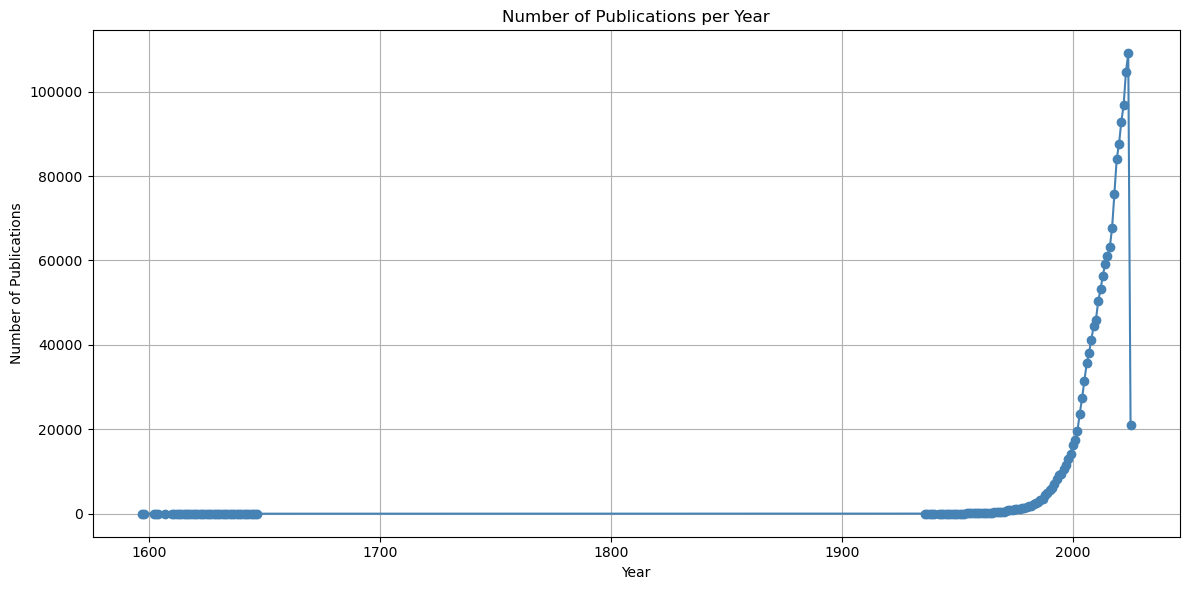

In [161]:

plt.figure(figsize=(12, 6))
plt.plot(pub_per_year.index, pub_per_year.values, marker='o', linestyle='-', color='steelblue')
plt.title('Number of Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.tight_layout()
plt.show()

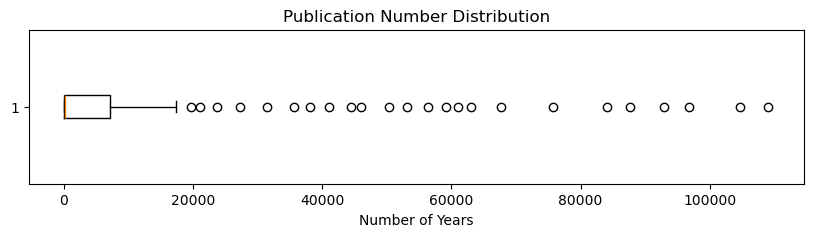

In [162]:
# Box plot of publication number distribution
plt.figure(figsize=(10, 2))
plt.boxplot(pub_per_year, vert=False)
plt.title('Publication Number Distribution')
plt.xlabel('Number of Years')

# Show plot
plt.show()



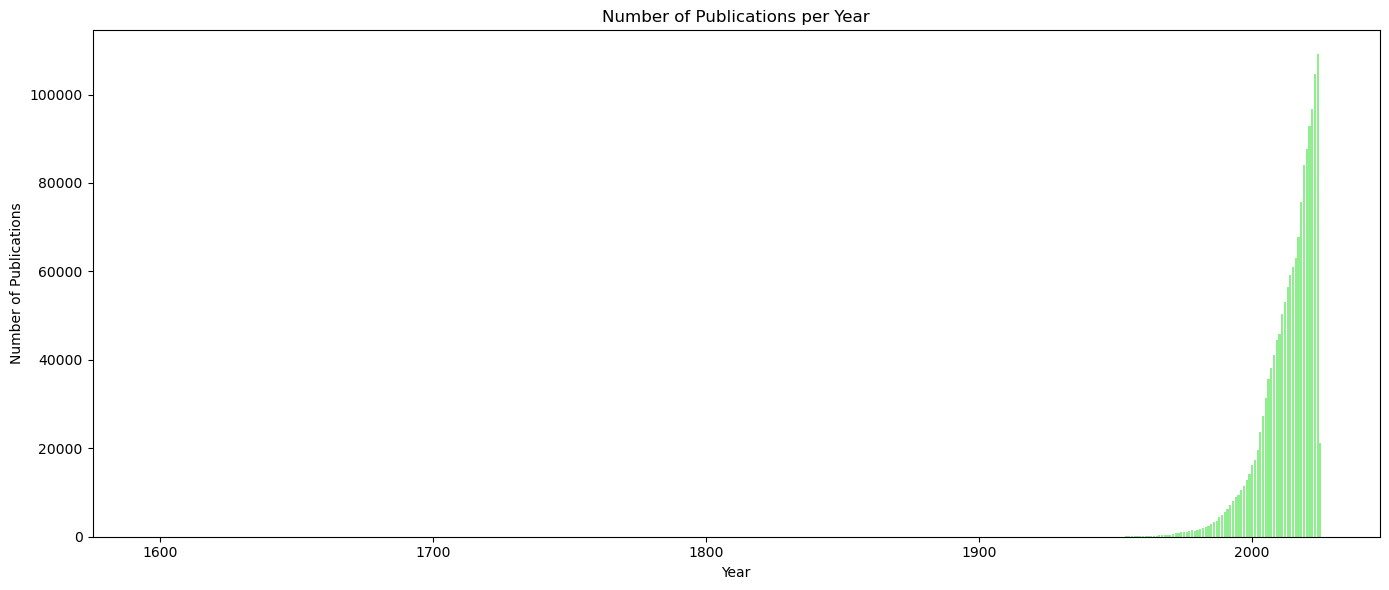

In [163]:
plt.figure(figsize=(14, 6))
plt.bar(pub_per_year.index, pub_per_year.values, color='lightgreen')
plt.title('Number of Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.tight_layout()
plt.show()

In [164]:
# TASK 2

In [165]:
# Year with the most publications
most_pubs_year = pub_per_year.idxmax()
most_pubs_value = pub_per_year.max()

print(f"The year with the most publications is {most_pubs_year} with {most_pubs_value} publications.")

The year with the most publications is 2024 with 109068 publications.


Number of bins (FD rule): 39


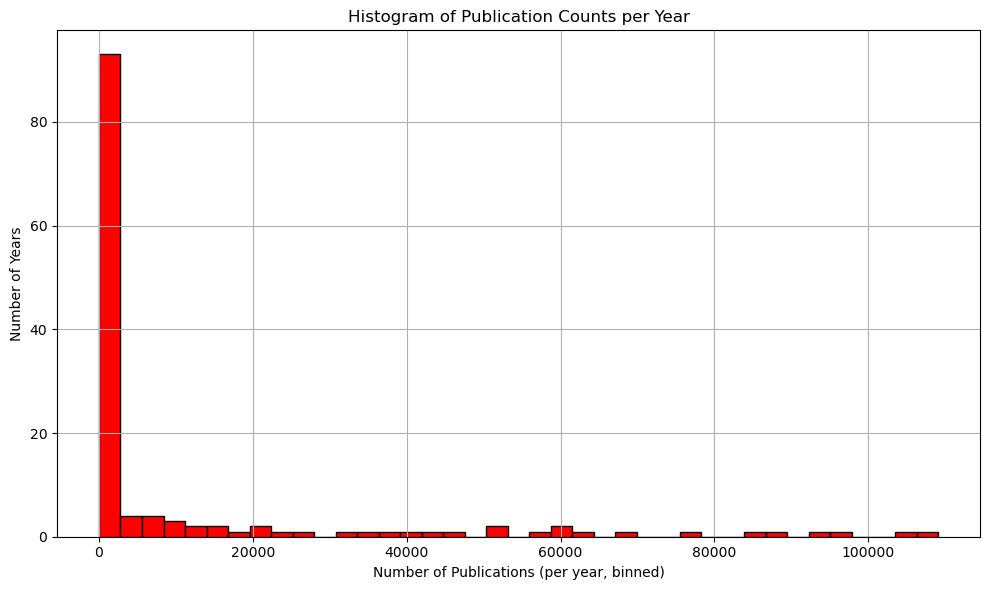

In [166]:

# Calculating number of bins required using FD rule
length_of_pub = len(pub_per_year)
IQR = pub_per_year.quantile(0.75) - pub_per_year.quantile(0.25)
bin_width = 2 * IQR / (length_of_pub ** (1/3))
num_bins = int((pub_per_year.max() - pub_per_year.min()) / bin_width)
print(f"Number of bins (FD rule): {num_bins}")

# Histogram of publication counts per year
plt.figure(figsize=(10, 6))
plt.hist(pub_per_year.values, bins=num_bins, color='red', edgecolor='black')
#plt.hist(df_clean['year'], bins=5, color='red', edgecolor='black')
plt.title('Histogram of Publication Counts per Year')
plt.xlabel('Number of Publications (per year, binned)')
plt.ylabel('Number of Years')
plt.grid(True)
plt.tight_layout()
plt.show()

In [167]:
# Class 1: Removing very early years before 1900
no_of_early_years = df_clean[df_clean['year'] < 1900]
early_years = df_clean[df_clean['year'] >= 1900]
print(f"Class 1 - Early Years <1900: {len(no_of_early_years)} rows")
print("Example row:\n", early_years.head(1))

Class 1 - Early Years <1900: 296 rows
Example row:
                       #key  year
0  books/acm/17/OSCSPK2017  2017


Corrected Basic Statistics of Number of Publications per Year:
Minimum publications in a year: 1
Maximum publications in a year: 109068
Lower quartile (25th percentile): 129.0
Upper quartile (75th percentile): 21132.0
Median: 1738.0
Mean publications per year: 17534.81


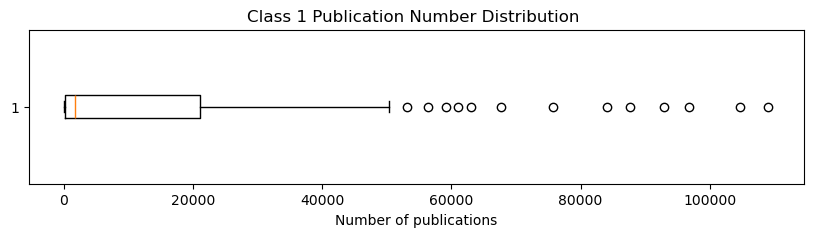

In [168]:
class1_pub_per_year = early_years.groupby('year').size()

# Step 7: Calculate basic statistics
min_pubs = class1_pub_per_year.min()
max_pubs = class1_pub_per_year.max()
lower_quartile = class1_pub_per_year.quantile(0.25)
median = class1_pub_per_year.median()
upper_quartile = class1_pub_per_year.quantile(0.75)
mean = class1_pub_per_year.mean()

print("Corrected Basic Statistics of Number of Publications per Year:")
print(f"Minimum publications in a year: {min_pubs}")
print(f"Maximum publications in a year: {max_pubs}")
print(f"Lower quartile (25th percentile): {lower_quartile}")
print(f"Upper quartile (75th percentile): {upper_quartile}")
print(f"Median: {median}")
print(f"Mean publications per year: {mean:.2f}")

# Box plot of publication number distribution
plt.figure(figsize=(10, 2))
plt.boxplot(class1_pub_per_year, vert=False)
plt.title('Class 1 Publication Number Distribution ')
plt.xlabel('Number of publications')
plt.show()



In [169]:
# Class 2: Future or abnormal years >2024
no_of_future_years = df_clean[df_clean['year'] > 2024]
future_years = df_clean[df_clean['year'] < 2025]  
print(f"Class 2 - Future/Anomalous Years >2024: {len(no_of_future_years)} rows")
print("Example row:\n", future_years.head(1))

Class 2 - Future/Anomalous Years >2024: 21132 rows
Example row:
                       #key  year
0  books/acm/17/OSCSPK2017  2017


Corrected Basic Statistics of Number of Publications per Year:
Minimum publications in a year: 1
Maximum publications in a year: 109068
Lower quartile (25th percentile): 4.0
Upper quartile (75th percentile): 6400.75
Median: 105.5
Mean publications per year: 11664.86


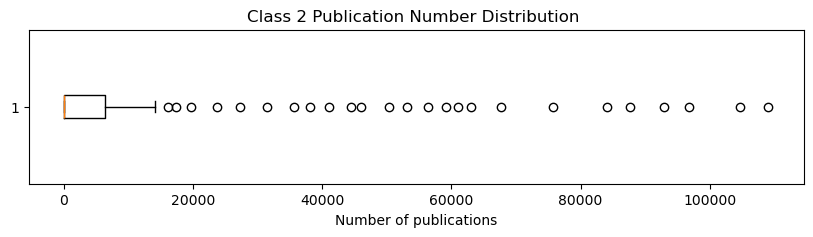

In [170]:
class2_pub_per_year = future_years.groupby('year').size()

# Step 7: Calculate basic statistics
min_pubs = class2_pub_per_year.min()
max_pubs = class2_pub_per_year.max()
lower_quartile = class2_pub_per_year.quantile(0.25)
median = class2_pub_per_year.median()
upper_quartile = class2_pub_per_year.quantile(0.75)
mean = class2_pub_per_year.mean()

print("Corrected Basic Statistics of Number of Publications per Year:")
print(f"Minimum publications in a year: {min_pubs}")
print(f"Maximum publications in a year: {max_pubs}")
print(f"Lower quartile (25th percentile): {lower_quartile}")
print(f"Upper quartile (75th percentile): {upper_quartile}")
print(f"Median: {median}")
print(f"Mean publications per year: {mean:.2f}")

plt.figure(figsize=(10, 2))
plt.boxplot(class2_pub_per_year, vert=False)
plt.title('Class 2 Publication Number Distribution ')
plt.xlabel('Number of publications')
plt.show()

In [171]:
# Filter to keep only years between 1900 and 2025
df_filtered = df_clean[(df_clean['year'] >= 1900) & (df_clean['year'] < 2025)]
print(f"After filtering valid years: {len(df_clean)} records")

After filtering valid years: 1560894 records
